<a href="https://colab.research.google.com/github/SatoJin02/BDA_course25/blob/main/Ex09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# ======================================================================
# ✅ STEP 0: Install Libraries
# ======================================================================
!pip install geopandas folium

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re
import warnings
warnings.filterwarnings("ignore")

In [4]:
# ======================================================================
# ✅ STEP 1: Load Your Dataset
# ======================================================================
df = pd.read_csv("/content/ETL_DATASET.csv")  # ← あなたがアップしたファイル

print("✅ Loaded ETL_DATASET.csv")
print("Shape:", df.shape)
display(df.head())

✅ Loaded ETL_DATASET.csv
Shape: (50, 51)


,,TimeStamp,Point(139.0428727 36.3816035),Point(138.9955116 36.33801589999999),Point(139.342672 36.4105658),Point(139.3817322 36.2909131),Point(139.0432674 36.64710669999999),Point(139.5317782 36.2499123),Point(138.8939601 36.25898610000001),Point(138.8275195 36.5786787),...,Point(139.5216362 36.05981939999999),Point(139.5703631 35.9769418),Point(139.7905143 35.839652),Point(139.7638423 35.93410739999999),Point(139.6646544 35.81905709999999),Point(139.6425316 35.8209206),Point(139.3967361 35.8313321),Point(139.616884 35.778059),Point(139.8355327 35.820508),Point(139.5490558 35.8567086)
0,0,2018-01-01 01:00:00,13.0,18.0,20.0,23.0,14.0,26.0,4.0,3.0,...,10.0,27.0,31.0,26.0,16.0,15.0,15.0,19.0,30.0,17.0
1,1,2018-01-01 02:00:00,12.0,22.0,15.0,32.0,16.0,26.0,2.0,4.0,...,10.0,24.0,31.0,27.0,20.0,17.0,15.0,22.0,34.0,16.0
2,2,2018-01-01 03:00:00,12.0,19.0,16.0,32.0,16.0,21.0,2.0,1.0,...,10.0,23.0,32.0,19.0,24.0,18.0,8.0,24.0,34.0,19.0
3,3,2018-01-01 04:00:00,11.0,16.0,11.0,28.0,6.0,24.0,5.0,1.0,...,12.0,22.0,34.0,18.0,21.0,19.0,8.0,28.0,32.0,15.0
4,4,2018-01-01 05:00:00,11.0,10.0,8.0,27.0,9.0,22.0,8.0,9.0,...,15.0,18.0,29.0,22.0,20.0,19.0,6.0,26.0,26.0,20.0


In [7]:
# ======================================================================
# ✅ STEP 2: Extract Sensor Coordinates from Column Names
#    Column example: "Point(139.0428727 36.3816035)"
# ======================================================================

def extract_lon_lat_from_col(colname):
    match = re.findall(r"Point\(([-0-9.]+)\s+([-0-9.]+)\)", colname)
    if match:
        lon, lat = match[0]
        return float(lon), float(lat)
    return None, None

sensor_info = []

for col in df.columns:
    if col.startswith("Point("):
        lon, lat = extract_lon_lat_from_col(col)
        sensor_info.append({
            "sensor": col,
            "lon": lon,
            "lat": lat
        })

sensor_df = pd.DataFrame(sensor_info)
print("✅ Extracted sensors and coordinates:")
display(sensor_df.head())

✅ Extracted sensors and coordinates:


,sensor,lon,lat
0,Point(139.0428727 36.3816035),139.042873,36.381603
1,Point(138.9955116 36.33801589999999),138.995512,36.338016
2,Point(139.342672 36.4105658),139.342672,36.410566
3,Point(139.3817322 36.2909131),139.381732,36.290913
4,Point(139.0432674 36.64710669999999),139.043267,36.647107


In [8]:
# ======================================================================
# ✅ STEP 3: Create a dataset of sensors with their AVERAGE pollution value
# ======================================================================
sensor_values = []

for col in sensor_df["sensor"]:
    avg_val = df[col].mean()
    sensor_values.append(avg_val)

sensor_df["avg_value"] = sensor_values

print("✅ Dataset ready for clustering:")
display(sensor_df.head())

✅ Dataset ready for clustering:


,sensor,lon,lat,avg_value
0,Point(139.0428727 36.3816035),139.042873,36.381603,5.64
1,Point(138.9955116 36.33801589999999),138.995512,36.338016,18.76
2,Point(139.342672 36.4105658),139.342672,36.410566,6.10
3,Point(139.3817322 36.2909131),139.381732,36.290913,9.40
4,Point(139.0432674 36.64710669999999),139.043267,36.647107,6.10


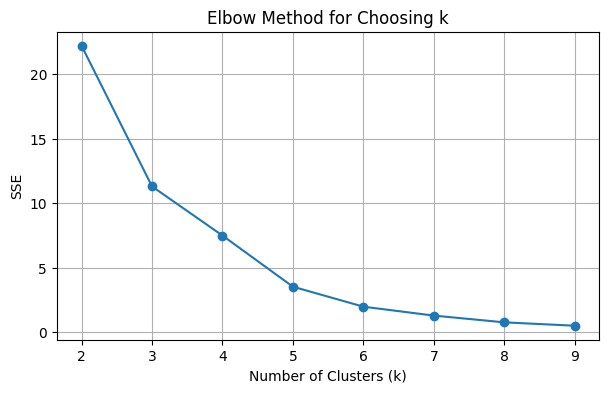

✅ Using k = 3
✅ Clustered sensors:


,sensor,lon,lat,avg_value,cluster
0,Point(139.0428727 36.3816035),139.042873,36.381603,5.64,1
1,Point(138.9955116 36.33801589999999),138.995512,36.338016,18.76,2
2,Point(139.342672 36.4105658),139.342672,36.410566,6.10,0
3,Point(139.3817322 36.2909131),139.381732,36.290913,9.40,0
4,Point(139.0432674 36.64710669999999),139.043267,36.647107,6.10,0


In [9]:
# ======================================================================
# ✅ STEP 4: K-Means Clustering (Using Average Pollution)
# ======================================================================
X = sensor_df[["avg_value"]].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method
SSE = []
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    SSE.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K, SSE, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE")
plt.title("Elbow Method for Choosing k")
plt.grid(True)
plt.show()

# ✅ Choose optimal k (modify if needed after viewing plot)
k_opt = 3
print("✅ Using k =", k_opt)

kmeans = KMeans(n_clusters=k_opt, random_state=42)
sensor_df["cluster"] = kmeans.fit_predict(X_scaled)

print("✅ Clustered sensors:")
display(sensor_df.head())

In [10]:
# ======================================================================
# ✅ STEP 5: Convert to GeoDataFrame (for mapping)
# ======================================================================
gdf = gpd.GeoDataFrame(
    sensor_df,
    geometry=gpd.points_from_xy(sensor_df["lon"], sensor_df["lat"]),
    crs="EPSG:4326"
)

In [11]:
# ======================================================================
# ✅ STEP 6: Visualize on Folium Map
# ======================================================================
center_lat = sensor_df["lat"].mean()
center_lon = sensor_df["lon"].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=8)

colors = ["red", "blue", "green", "purple", "orange", "pink", "black"]

for _, row in gdf.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=6,
        popup=f"Cluster {row['cluster']}<br>Avg: {row['avg_value']:.2f}",
        color=colors[row["cluster"] % len(colors)],
        fill=True,
        fill_color=colors[row["cluster"] % len(colors)]
    ).add_to(m)

print("✅ Map ready!")
m

✅ Map ready!
